In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,  validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.6373 - accuracy: 0.8099 - val_loss: 0.3576 - val_accuracy: 0.8842
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2543 - accuracy: 0.9210 - val_loss: 0.3745 - val_accuracy: 0.8788
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1652 - accuracy: 0.9490 - val_loss: 0.1780 - val_accuracy: 0.9444
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1181 - accuracy: 0.9623 - val_loss: 0.1245 - val_accuracy: 0.9632
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0867 - accuracy: 0.9720 - val_loss: 0.1195 - val_accuracy: 0.9662
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0646 - accuracy: 0.9793 - val_loss: 0.1118 - val_accuracy: 0.9691
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0476 - accuracy: 0.9844 - val_loss: 0.1677 - val_accuracy: 0.9544
Epoch 

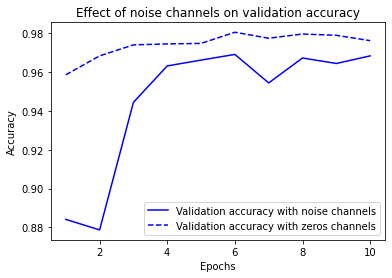

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 5ms/step - loss: 2.3168 - accuracy: 0.1037 - val_loss: 2.3083 - val_accuracy: 0.1049
Epoch 2/2
375/375 [==============================] - 2s 5ms/step - loss: 2.3004 - accuracy: 0.1146 - val_loss: 2.3103 - val_accuracy: 0.1042


In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 5ms/step - loss: 444.2065 - accuracy: 0.3525 - val_loss: 2.5298 - val_accuracy: 0.1943
Epoch 2/2
375/375 [==============================] - 2s 5ms/step - loss: 7.6583 - accuracy: 0.2565 - val_loss: 2.4757 - val_accuracy: 0.2853


In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 5ms/step - loss: 0.3758 - accuracy: 0.9097 - val_loss: 0.1411 - val_accuracy: 0.9601
Epoch 2/2
375/375 [==============================] - 2s 5ms/step - loss: 0.1396 - accuracy: 0.9638 - val_loss: 0.1619 - val_accuracy: 0.9663


In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.6691 - accuracy: 0.8363 - val_loss: 0.3571 - val_accuracy: 0.9043
Epoch 2/2
375/375 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.9028 - val_loss: 0.3063 - val_accuracy: 0.9150


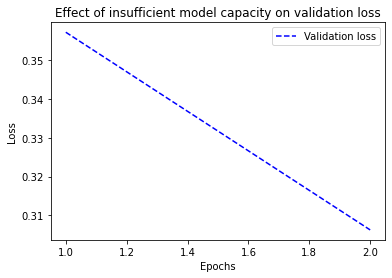

In [11]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [12]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8987 - val_loss: 0.1824 - val_accuracy: 0.9473
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9530 - val_loss: 0.1250 - val_accuracy: 0.9631


In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 23ms/step - loss: 0.5356 - accuracy: 0.7769 - val_loss: 0.3954 - val_accuracy: 0.8709
Epoch 2/2
30/30 [==============================] - 0s 12ms/step - loss: 0.3231 - accuracy: 0.9000 - val_loss: 0.3226 - val_accuracy: 0.8788


In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 24ms/step - loss: 0.6069 - accuracy: 0.7621 - val_loss: 0.5216 - val_accuracy: 0.8570
Epoch 2/2
30/30 [==============================] - 0s 12ms/step - loss: 0.4584 - accuracy: 0.8853 - val_loss: 0.4252 - val_accuracy: 0.8781


In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 4s 89ms/step - loss: 0.5439 - accuracy: 0.7435 - val_loss: 0.5095 - val_accuracy: 0.7756
Epoch 2/2
30/30 [==============================] - 2s 78ms/step - loss: 0.2589 - accuracy: 0.8950 - val_loss: 0.2987 - val_accuracy: 0.8820


In [16]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 22ms/step - loss: 0.6136 - accuracy: 0.7663 - val_loss: 0.4762 - val_accuracy: 0.8712
Epoch 2/2
30/30 [==============================] - 0s 13ms/step - loss: 0.4076 - accuracy: 0.8979 - val_loss: 0.4022 - val_accuracy: 0.8825


In [17]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 23ms/step - loss: 0.6210 - accuracy: 0.6424 - val_loss: 0.4974 - val_accuracy: 0.8523
Epoch 2/2
30/30 [==============================] - 0s 12ms/step - loss: 0.4868 - accuracy: 0.7791 - val_loss: 0.3758 - val_accuracy: 0.8714


In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 22ms/step - loss: 0.6425 - accuracy: 0.6305 - val_loss: 0.5524 - val_accuracy: 0.8431
Epoch 2/2
30/30 [==============================] - 0s 12ms/step - loss: 0.5303 - accuracy: 0.7533 - val_loss: 0.4347 - val_accuracy: 0.8670
